In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

In [2]:
url = "https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png"
strav = skimage.io.imread(url) / 255

In [3]:
cols, rows = np.meshgrid(np.linspace(-100, 100, strav.shape[1]), np.linspace(-100, 100, strav.shape[0]))
noise = np.sin(2 * np.pi * 0.02 * (cols * np.cos(np.pi / 6) + rows * np.sin(np.pi / 6)))
noise = (noise - np.min(noise)) / (np.max(noise) - np.min(noise))
strav_with_noise = strav + noise
strav_with_noise = (strav_with_noise - np.min(strav_with_noise)) / (np.max(strav_with_noise) - np.min(strav_with_noise))

In [4]:
u, sigma, vt = np.linalg.svd(strav_with_noise)
noise = np.zeros_like(strav_with_noise)
filtered = np.zeros_like(strav_with_noise)
for i in range(strav_with_noise.shape[1]):
    if i == 1 or i == 2:
        noise += sigma[i] * np.outer(u[:, i], vt[i, :])
    else:
        filtered += sigma[i] * np.outer(u[:, i], vt[i, :])

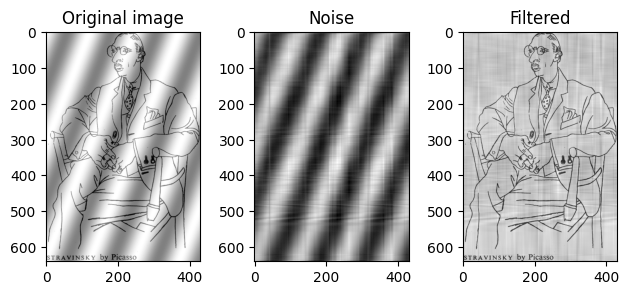

In [5]:
fig, axes = plt.subplots(1, 3)
axes[0].set_title("Original image")
axes[0].imshow(strav_with_noise, cmap="gray")
axes[1].set_title("Noise")
axes[1].imshow(noise, cmap="gray")
axes[2].set_title("Filtered")
axes[2].imshow(filtered, cmap="gray")
fig.tight_layout()
plt.show()